In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import random_split
import pandas as pd
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import trange, tqdm
import os
from utils import *
from torchvision.models import vgg16, vgg16_bn

In [72]:
batch_size=64
t = transforms.Compose([
                       transforms.Resize([128,128]),
                       transforms.ToTensor(),
                       transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#                           transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

                            ])
cifar_train = torchvision.datasets.CIFAR10(root = './CIFAR10/' , train = True , download = True , transform = t)
cifar_test = torchvision.datasets.CIFAR10(root = './CIFAR10/' , train = False , download = True , transform = t)


train_loader = DataLoader(cifar_train,
                          batch_size = batch_size,
                          shuffle = True,
                          )
val_loader = DataLoader(cifar_test,
                        batch_size = batch_size,
                        shuffle = False,
                        )


Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


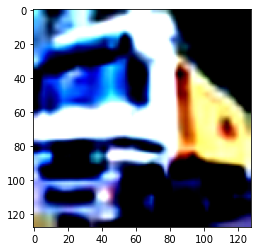

In [73]:
cifar_train[0][0].shape
plt.imshow(cifar_train[1][0].permute(1,2,0))

In [74]:
model = vgg16(pretrained=True).cuda()

In [76]:
with torch.no_grad():
#     outs = torch.zeros((10000,25088),device="cuda")
    outs = torch.zeros((10000,8192),device="cuda")
    ys = torch.zeros(10000,device="cuda")
    for i,(X,y) in tqdm(enumerate(val_loader),total = len(val_loader)):
        out = model.features(X.cuda()).flatten(start_dim=1)
        outs[batch_size*i:batch_size*(i+1),:]=out
        ys[batch_size*i:batch_size*(i+1)] = y.cuda()

  0%|          | 0/157 [00:00<?, ?it/s]

In [80]:
SI_evaluation(outs, ys)

tensor(0.5921, device='cuda:0')

In [82]:
%%time
features, SIs = forward_selection(outs,ys,n=100)

  0%|          | 0/8192 [00:00<?, ?it/s]

best SI:0.16329999268054962 for 3578


  0%|          | 0/8191 [00:00<?, ?it/s]

best SI:0.20789998769760132 for 6701


  0%|          | 0/8190 [00:00<?, ?it/s]

best SI:0.2459999918937683 for 3397


  0%|          | 0/8189 [00:00<?, ?it/s]

best SI:0.2824999988079071 for 4341


  0%|          | 0/8188 [00:00<?, ?it/s]

best SI:0.30789998173713684 for 5302


  0%|          | 0/8187 [00:00<?, ?it/s]

best SI:0.33319997787475586 for 4334


  0%|          | 0/8186 [00:00<?, ?it/s]

best SI:0.35429999232292175 for 2930


  0%|          | 0/8185 [00:00<?, ?it/s]

best SI:0.37369999289512634 for 6166


  0%|          | 0/8184 [00:00<?, ?it/s]

best SI:0.3896999955177307 for 1386


  0%|          | 0/8183 [00:00<?, ?it/s]

best SI:0.4052000045776367 for 1149


  0%|          | 0/8182 [00:00<?, ?it/s]

best SI:0.41929998993873596 for 5253


  0%|          | 0/8181 [00:00<?, ?it/s]

best SI:0.430899977684021 for 746


  0%|          | 0/8180 [00:00<?, ?it/s]

best SI:0.44200000166893005 for 3242


  0%|          | 0/8179 [00:00<?, ?it/s]

best SI:0.45229998230934143 for 58


  0%|          | 0/8178 [00:00<?, ?it/s]

best SI:0.45979997515678406 for 218


  0%|          | 0/8177 [00:00<?, ?it/s]

best SI:0.46629998087882996 for 4233


  0%|          | 0/8176 [00:00<?, ?it/s]

best SI:0.4745999872684479 for 5527


  0%|          | 0/8175 [00:00<?, ?it/s]

best SI:0.4810999929904938 for 2993


  0%|          | 0/8174 [00:00<?, ?it/s]

best SI:0.4885999858379364 for 1162


  0%|          | 0/8173 [00:00<?, ?it/s]

best SI:0.4921000003814697 for 6581


  0%|          | 0/8172 [00:00<?, ?it/s]

best SI:0.49559998512268066 for 6571


  0%|          | 0/8171 [00:00<?, ?it/s]

best SI:0.49889999628067017 for 886


  0%|          | 0/8170 [00:00<?, ?it/s]

best SI:0.5018999576568604 for 6822


  0%|          | 0/8169 [00:00<?, ?it/s]

best SI:0.5047000050544739 for 6398


  0%|          | 0/8168 [00:00<?, ?it/s]

best SI:0.507099986076355 for 3005


  0%|          | 0/8167 [00:00<?, ?it/s]

best SI:0.5099999904632568 for 4461


  0%|          | 0/8166 [00:00<?, ?it/s]

best SI:0.5121999979019165 for 4249


  0%|          | 0/8165 [00:00<?, ?it/s]

best SI:0.5155999660491943 for 911


  0%|          | 0/8164 [00:00<?, ?it/s]

best SI:0.517799973487854 for 697


  0%|          | 0/8163 [00:00<?, ?it/s]

best SI:0.5203999876976013 for 3006


  0%|          | 0/8162 [00:00<?, ?it/s]

best SI:0.5220999717712402 for 7188


  0%|          | 0/8161 [00:00<?, ?it/s]

best SI:0.5234999656677246 for 2153


  0%|          | 0/8160 [00:00<?, ?it/s]

best SI:0.525600016117096 for 3996


  0%|          | 0/8159 [00:00<?, ?it/s]

best SI:0.5270000100135803 for 2641


  0%|          | 0/8158 [00:00<?, ?it/s]

best SI:0.5288000106811523 for 2753


  0%|          | 0/8157 [00:00<?, ?it/s]

best SI:0.5307999849319458 for 4378


  0%|          | 0/8156 [00:00<?, ?it/s]

best SI:0.5327000021934509 for 2757


  0%|          | 0/8155 [00:00<?, ?it/s]

best SI:0.5339999794960022 for 3505


  0%|          | 0/8154 [00:00<?, ?it/s]

best SI:0.535099983215332 for 7076


  0%|          | 0/8153 [00:00<?, ?it/s]

best SI:0.536899983882904 for 5960


  0%|          | 0/8152 [00:00<?, ?it/s]

best SI:0.538100004196167 for 1301


  0%|          | 0/8151 [00:00<?, ?it/s]

best SI:0.5397999882698059 for 2864


  0%|          | 0/8150 [00:00<?, ?it/s]

best SI:0.5411999821662903 for 4364


  0%|          | 0/8149 [00:00<?, ?it/s]

best SI:0.5430999994277954 for 4136


  0%|          | 0/8148 [00:00<?, ?it/s]

best SI:0.5449000000953674 for 5957


  0%|          | 0/8147 [00:00<?, ?it/s]

best SI:0.5460000038146973 for 5005


  0%|          | 0/8146 [00:00<?, ?it/s]

best SI:0.5471999645233154 for 3320


  0%|          | 0/8145 [00:00<?, ?it/s]

best SI:0.5482000112533569 for 2777


  0%|          | 0/8144 [00:00<?, ?it/s]

best SI:0.5490999817848206 for 177


  0%|          | 0/8143 [00:00<?, ?it/s]

best SI:0.550000011920929 for 370


  0%|          | 0/8142 [00:00<?, ?it/s]

best SI:0.5508999824523926 for 2321


  0%|          | 0/8141 [00:00<?, ?it/s]

best SI:0.5518999695777893 for 3255


  0%|          | 0/8140 [00:00<?, ?it/s]

best SI:0.5527999997138977 for 7077


  0%|          | 0/8139 [00:00<?, ?it/s]

best SI:0.553600013256073 for 2316


  0%|          | 0/8138 [00:00<?, ?it/s]

best SI:0.5541999936103821 for 3632


  0%|          | 0/8137 [00:00<?, ?it/s]

best SI:0.5546999573707581 for 1393


  0%|          | 0/8136 [00:00<?, ?it/s]

best SI:0.5551999807357788 for 5866


  0%|          | 0/8135 [00:00<?, ?it/s]

best SI:0.5555999875068665 for 115


  0%|          | 0/8134 [00:00<?, ?it/s]

best SI:0.5561000108718872 for 4433


  0%|          | 0/8133 [00:00<?, ?it/s]

best SI:0.5565999746322632 for 988


  0%|          | 0/8132 [00:00<?, ?it/s]

best SI:0.5569999814033508 for 2980


  0%|          | 0/8131 [00:00<?, ?it/s]

best SI:0.5573999881744385 for 1014


  0%|          | 0/8130 [00:00<?, ?it/s]

best SI:0.5577999949455261 for 5199


  0%|          | 0/8129 [00:00<?, ?it/s]

best SI:0.5582999587059021 for 5945


  0%|          | 0/8128 [00:00<?, ?it/s]

best SI:0.5584999918937683 for 5220


  0%|          | 0/8127 [00:00<?, ?it/s]

best SI:0.5586999654769897 for 4787


  0%|          | 0/8126 [00:00<?, ?it/s]

best SI:0.558899998664856 for 2307


  0%|          | 0/8125 [00:00<?, ?it/s]

best SI:0.5591999888420105 for 7004


  0%|          | 0/8124 [00:00<?, ?it/s]

best SI:0.559499979019165 for 7361


  0%|          | 0/8123 [00:00<?, ?it/s]

best SI:0.5597999691963196 for 4296


  0%|          | 0/8122 [00:00<?, ?it/s]

best SI:0.5602999925613403 for 7377


  0%|          | 0/8121 [00:00<?, ?it/s]

best SI:0.5605999827384949 for 7109


  0%|          | 0/8120 [00:00<?, ?it/s]

best SI:0.5607999563217163 for 6175


  0%|          | 0/8119 [00:00<?, ?it/s]

best SI:0.5611000061035156 for 7356


  0%|          | 0/8118 [00:00<?, ?it/s]

best SI:0.5613999962806702 for 413


  0%|          | 0/8117 [00:00<?, ?it/s]

best SI:0.5616999864578247 for 3152


  0%|          | 0/8116 [00:00<?, ?it/s]

best SI:0.5618999600410461 for 5198


  0%|          | 0/8115 [00:00<?, ?it/s]

best SI:0.5622000098228455 for 2287


  0%|          | 0/8114 [00:00<?, ?it/s]

best SI:0.5623999834060669 for 5195


  0%|          | 0/8113 [00:00<?, ?it/s]

best SI:0.5626999735832214 for 6272


  0%|          | 0/8112 [00:00<?, ?it/s]

best SI:0.5629000067710876 for 5149


  0%|          | 0/8111 [00:00<?, ?it/s]

best SI:0.562999963760376 for 836


  0%|          | 0/8110 [00:00<?, ?it/s]

best SI:0.5630999803543091 for 1551


  0%|          | 0/8109 [00:00<?, ?it/s]

best SI:0.5631999969482422 for 5651


  0%|          | 0/8108 [00:00<?, ?it/s]

best SI:0.5633999705314636 for 336


  0%|          | 0/8107 [00:00<?, ?it/s]

best SI:0.5636000037193298 for 1394


  0%|          | 0/8106 [00:00<?, ?it/s]

best SI:0.5637999773025513 for 3432


  0%|          | 0/8105 [00:00<?, ?it/s]

best SI:0.5640999674797058 for 8028


  0%|          | 0/8104 [00:00<?, ?it/s]

best SI:0.5640999674797058 for 180


  0%|          | 0/8103 [00:00<?, ?it/s]

best SI:0.5640999674797058 for 572


  0%|          | 0/8102 [00:00<?, ?it/s]

best SI:0.5640999674797058 for 5150


  0%|          | 0/8101 [00:00<?, ?it/s]

best SI:0.5640999674797058 for 6252


  0%|          | 0/8100 [00:00<?, ?it/s]

best SI:0.5640999674797058 for 2858


  0%|          | 0/8099 [00:00<?, ?it/s]

best SI:0.5641999840736389 for 3932


  0%|          | 0/8098 [00:00<?, ?it/s]

best SI:0.5644999742507935 for 5795


  0%|          | 0/8097 [00:00<?, ?it/s]

best SI:0.5647000074386597 for 284


  0%|          | 0/8096 [00:00<?, ?it/s]

best SI:0.564799964427948 for 1615


  0%|          | 0/8095 [00:00<?, ?it/s]

best SI:0.5648999810218811 for 5308


  0%|          | 0/8094 [00:00<?, ?it/s]

best SI:0.5649999976158142 for 6253


  0%|          | 0/8093 [00:00<?, ?it/s]

best SI:0.5649999976158142 for 2435


  0%|          | 0/8092 [00:00<?, ?it/s]

best SI:0.5651000142097473 for 6280
best features obtaied
CPU times: user 1d 1h 2min 14s, sys: 1d 5h 16min 19s, total: 2d 6h 18min 34s
Wall time: 1d 3h 41min 7s


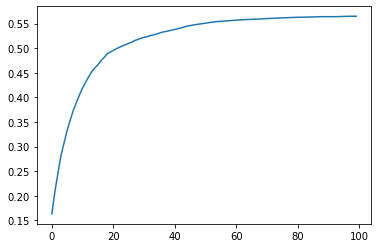

In [83]:
plt.plot(SIs)